# Neural Networks


Neural Networks are composed of layers of neurons, where each neuron consists of a value x and does a simple linear computation, where its output corresponds to the next neuron in the next layer.
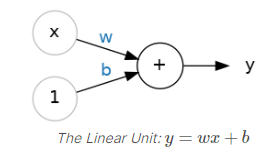As mentioned before, the neuron contains a value x, and the connection between the neuron and the next neuron in the next layer is defined as the value w, the weight. In addition, each computation from one layer to the next layer contains a bias b, depending on whether or not we want to 'see' this number or not. The neural networks learns by modifying the weights and the bias of each connection through testing.

We can define neurons as input values, where through the neural network, we input a value, and we obtain an output. In many cases, the neural network will have multiple different inputs that will all work together to form the next neuron of the layer. In this case, it will not be a linear equation anymore, but rather an equation consisting of a linear combination of all the weights connecting to that single neuron and its input values, plus the bias of our output neuron.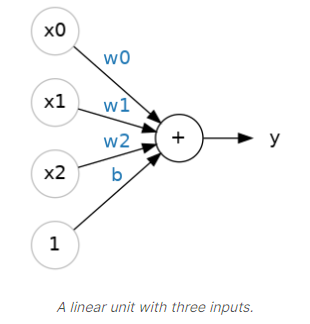In this example, we have the equation $$y = w_0x_0+w_1x_1+w_2x_2+w_3x_3+b$$

To create a neural network model, we will use keras which creates a neural network as a stack of layers. So, if we want to create a neural network with 3 input neuron that is connected to one output neuron in the outer layer, we write the following code:

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(units=1, input_shape=[3])])

The first parameter of the function Dense() defines how many output neurons we want, and the second parameter of the function defines how many input neurons we want to connect to the output neuron. When we first launch our neural network, our weights and biases will be random; these values are what we want to find through heavy training and testing, and when we get our test results from the neural network, we want to optimize the neural network by changing the weights such that the network will become more accurate. To check the weights of a neural network, we simply use the attribute model.weights.

In [8]:
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.1462189 ],
       [-0.69804585],
       [-0.05891085]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


Neural networks typically have hidden layers in between the input and the output layer. If we have more layers, we can transform the input into more complicated and complex ways, which gives us a better chance of getting the solution accurately. However, we cannot simply transform from one layer to the next layer through simple linear equation; thus, we use activation functions.

One common activation function is the rectifier function, or the ReLU function, defined as $$f(x) = \max(0, x)$$represented by the following function graph.

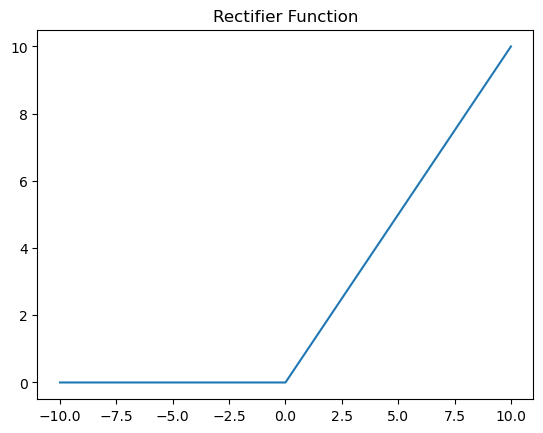

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 19)
y = np.maximum(0, x)
plt.plot(x, y)
plt.title("Rectifier Function")
plt.show()

Now, we will create another neural network, but this time with 2 hidden layers:

In [26]:
model = keras.Sequential([
    layers.Dense(units=4, activation="relu", input_shape=[6]),
    layers.Dense(units=3, activation="relu"),
    layers.Dense(units=1)
])

Once we have created a neural network, recall that its weights are randomly generated. What we must do is to collect data to train into the neural network, so that we can adjust the weights so that we get our desired targets. To do this, we must implement a loss function such that the computer knows whether or not the predicted target is correct or not and how much the computer missed its target, and we must also have an optimizer so that the network knows what weights to change to minimize the error.

A common loss function for regression problems is the mean absolute error function, which is simply the mean of all the absolute values of the difference between the prediction and the actual result. If we have a lower MAE, then that means that our network is more accurate.

Now that we know how to detect the problem, we must know how to solve it using an optimizer. Almost all optimizers use the method of stochastic gradient descent, which takes the n inputs as as n dimensional function, the loss function, and by finding its gradient through partial derivatives, we can find the slope at a given point at a certain direction. In addition, it just so happens that the maximum directional derivative is simply the gradient, thus when we want to minimize the function, we want to find the minimum directional derivative, it is simply the negative gradient. Minimizing the error involves going through the process of gradient descent repeatedly until we get the local minimum of the function.

To train the neural network, it follows that we must know how many iterations we want to take in the neural network, the size of the training data we want to train for each iteration, and how fast we want our computer to 'learn', or optimize the weights and biases to desirable values. For each training iteration, it follows that we must obviously have training data to traverse through the neural network. 

Some technical terms: 
- The batch size is the size of how many unique rows of data we will input into the neural network for each iteration. 
- Epoches is the number of iterations through the neural network. One iteration means that we will traverse the neural network for each sample in the batch, so if the batch size is 32, then one iteration means that the neural network is traversed 32 times
- The learning rate is the speed at which the computer approaches the desired values of the weight and the bias. In calculus terms, the learning rate is the speed at which we descend in the negative gradient direction. A slower rate means that our predictions will be more accurate, but our process is slow. However, a faster rate means that even though we decrease the loss function at a higher rate, it is likely that we will overshoot, and thus fail our entire gradient descent process.

If our batch consists of the entire dataset, it follows that the computer will better learn and optimize the weights and the biases, however it would take a lot of memory and time as the dataset is large, especially when the number of epoches is also large. Thus, we split the dataset into minibatches, to speed up the process and reduce the number of traversals. However, if the batch size is too small, the optimization might be more inaccurate, as the desired weights for one batch might be completely different from another batch. Epoches are also important, because if the number is too small, then our computer will not learn and optimize enough, and thus we underfit our data. But if the number is too big, then our computer will be incredibly accurate for our entire training data, however when encountered with foreign data, the results might be completely different, and thus overfitting occurs. 

In [27]:
model.compile(optimizer='adam', loss='mae')
# history = model.fit(train_X, trainy, validation_data=(val_X, val_y), batch_size=256, epochs=10)

# In the above code, we see that the neural network will train based on the X_train dataset to the target dataset y_train
# And will also check the error on the validation_data as well.

# After training, we can plot the results into matplotlib, by pulling data from the training process using the attribute
# history.history

In Keras, we can view the loss by plotting it using the history attribute, where we get the values of the loss function after the SGD process

In [30]:
# import pandas as pd
# history_df = pd.DataFrame(history.history)
# history_df.loc[:, ['loss', 'val_loss']].plot();


When testing any model, we must have two sets of data; a training dataset and a validation dataset. There are two attributes attributed when testing data: signal and noise. The signal is attributed to the part where our learning model is able to make new predictions from new data, while the noise is attributed to the part where our learning model adjusts to the random fluctuations or random patterns that occur in the data. To lower the loss of the validation data, it follows that we must come to a point where the computer is only able to learn signal, and not noise, since noise is random, and we do not want to implement these random patterns that is likely to not affect predictions of new data effectively. Ideally, we want models to learn as much signal and as little noise as possible. If the model learns too much noise, this leads to overfitting, and if the model doesn't learn much signal, this leads to underfitting.

The capacity of the neural network is the size of the neural network. To reduce underfitting, we can increase the capacity of the neural network by increasing the number of neurons in each layer(linear) or increase the number of layers in the neural network(nonlinear), and vice versa for overfitting.

When a model learns noise, the validation loss starts to increase. Thus, we can interrupt the training using early stopping to stop the increase using the module callbacks and the function EarlyStopping from keras.

In [1]:
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimum amount of change in the loss function to count as improvement
    patience=10, # the number of epochs to wait before stopping the process
    restore_best_weights=True # If false, computer will use the last value of weights, possibly not the best
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs = 500,
    callbacks=[early_stopping],
)

An easier way to minimize over and underfitting is to automate the process of optimizing hyperparameters, that is, the number of layers in the neural network, the number of neurons in each layer, the activation function, etc. There are a couple of ways to optimize hyperparameters. The first is using grid search. 

Grid Search is a technique that tries all possible combination of values in a hyperparameter, and chooses the best parameters based on their performance on the validation data. To implement this technique, we use the GridSearchCV class from the sklearn module, which takes a neural network, and a dictionary of parameters to choose from. It then returns the best possible parameters based on their performance on the validation data: